In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection

In [2]:
data = pd.read_csv("fashion-mnist_train.csv")

In [3]:
data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [4]:
data = open("fashion-mnist_train.csv")

In [5]:
f = data.readlines()
count = 0
for i in f:
    count += 1

In [6]:
print(count)

60001


In [7]:
X = np.zeros((count-1,784))
y = np.zeros((count-1,1))

In [8]:
for i in range(1,count):
    line=f[i].split(",")
    y[i-1] = line[0]
    X[i-1] = line[1:]

In [19]:
X = X.reshape(60000, 28, 28, 1)

In [20]:
X.shape

(60000, 28, 28, 1)

In [21]:
count_Class = pd.value_counts(data["label"], sort = True)
count_Class.plot("bar")
plt.show()

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [ ]:
y = data["label"]
X = np.zeros((60000,784))
X = data.loc[:,'pixel1':'pixel784']

In [22]:
y.shape

(60000, 1)

In [23]:
X.shape

(60000, 28, 28, 1)

In [24]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y)

In [25]:
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

In [26]:
y_val.shape

(15000, 1)

In [27]:
X_train = X_train/255
X_val = X_val/255

In [87]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding = "same"
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(
        64, (3, 3), activation="relu", input_shape=(28, 28, 1), padding = "same"
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation = "sigmoid")
])

In [88]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [90]:
model.fit(X_train, y_train_oh, epochs = 25)

Train on 45000 samples
Epoch 1/25
45000/45000 [==============================] - 64s 1ms/sample - loss: 0.6228 - accuracy: 0.7762
Epoch 2/25
45000/45000 [==============================] - 63s 1ms/sample - loss: 0.4002 - accuracy: 0.8572
Epoch 3/25
45000/45000 [==============================] - 63s 1ms/sample - loss: 0.3407 - accuracy: 0.8784
Epoch 4/25
45000/45000 [==============================] - 63s 1ms/sample - loss: 0.3094 - accuracy: 0.8880
Epoch 5/25
45000/45000 [==============================] - 63s 1ms/sample - loss: 0.2851 - accuracy: 0.8970s -
Epoch 6/25
45000/45000 [==============================] - 62s 1ms/sample - loss: 0.2648 - accuracy: 0.9030
Epoch 7/25
45000/45000 [==============================] - 63s 1ms/sample - loss: 0.2524 - accuracy: 0.9075
Epoch 8/25
45000/45000 [==============================] - 62s 1ms/sample - loss: 0.2356 - accuracy: 0.9125
Epoch 9/25
45000/45000 [==============================] - 62s 1ms/sample - loss: 0.2280 - accuracy: 0.9161
Epoch 10/25

In [91]:
model.evaluate(X_val, y_val_oh, verbose = 2)

15000/15000 - 5s - loss: 0.2291 - accuracy: 0.9289


[0.22905458124826353, 0.9289333]

In [92]:
data2 = open("fashion-mnist_test.csv")

f2 = data2.readlines()

count2=0

for i in f2:
    count2+=1
# count2-=1
print(count2)

10001


In [93]:
X_test = np.zeros((count2-1,784), dtype=np.uint8)
Y_test2 = np.zeros((count2-1,1))
for i in range(1,count2):
    Xx = f2[i].split(",")
    Y_test2[i-1] = Xx[0]
    X_test[i-1] = Xx[1:]
X_test = X_test/255

In [94]:
Y_test2.shape

(10000, 1)

In [95]:
X_test = X_test.reshape(10000, 28, 28, 1)
Y_test = keras.utils.to_categorical(Y_test2,10)

In [96]:
y_test = model.predict(X_test)

In [97]:
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [98]:
y_pred_test_max_probas

array([0.08918592, 0.9776489 , 0.10110294, ..., 0.9997923 , 0.9946668 ,
       0.57926035], dtype=float32)

In [99]:
y_test = keras.utils.to_categorical(y_pred_test_classes, 10)

In [100]:
y_pred_test_classes.shape

(10000,)

In [101]:
Y_test2.shape

(10000, 1)

Test accuracy: 0.929


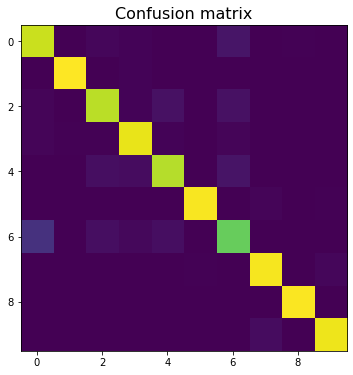

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(Y_test2, y_pred_test_classes))
plt.show
print("Test accuracy:", accuracy_score(Y_test2, y_pred_test_classes))

In [ ]:
with open('submission.csv', mode='w', newline='') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='y', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['ImageId', 'Label'])
    for i in range(count2-1):
        employee_writer.writerow([i+1, y[i][0]])
